In [5]:
from d2l import torch as d2l
import math
import torch
import numpy as np
import time
import random
from torch.utils import data

In [2]:
def synthetic_data(w, b, n_examples):
    X = torch.normal(0, 1, (n_examples, len(w)))
    y = torch.matmul(X, w) + b;
    y += torch.normal(0, 0.01, y.shape)
    
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
n_examples = 1000
X, y = synthetic_data(true_w, true_b, n_examples)

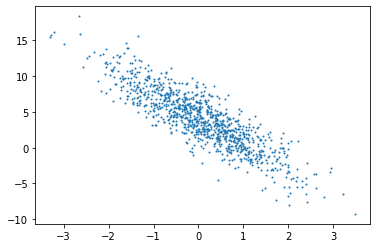

In [4]:
d2l.plt.scatter(d2l.numpy(X)[:, 1], d2l.numpy(y), 1)

In [6]:
def load_array(data_arrays, batch_size=10, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [7]:
batch_size = 10
data_iter = load_array((X, y), batch_size)

In [8]:
from torch import nn

In [9]:
net = nn.Sequential(nn.Linear(2, 1))

In [15]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [16]:
loss = nn.MSELoss()

In [21]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [22]:
epochs = 3
for epoch in range(epochs):
    for X_train, y_train in data_iter:
        l = loss(net(X_train), y_train)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(X), y)
    print(f'Epoch {epoch + 1}: loss: {l}')

Epoch 1: loss: 0.00029298310982994735
Epoch 2: loss: 9.508494986221194e-05
Epoch 3: loss: 9.537371079204604e-05


In [32]:
net[0].weight.reshape(true_w.shape) - true_w, net[0].bias.data - true_b

(tensor([ 0.0003, -0.0010], grad_fn=<SubBackward0>), tensor([0.0004]))